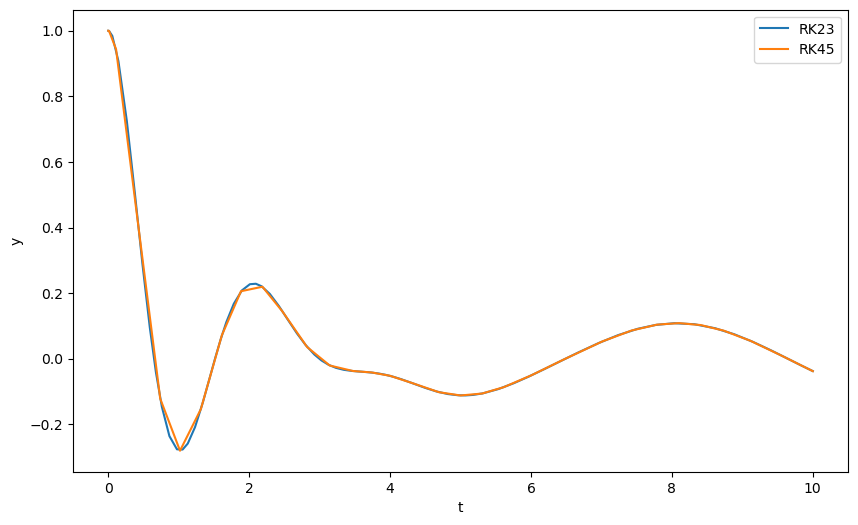

In [7]:
import numpy as np
from scipy.integrate import solve_ivp

# Функция, описывающая систему уравнений
def damped_oscillator(t, y):
    return [y[1], -2*y[1] - 10*y[0] + np.sin(t)]

# Начальные условия
y0 = [1, 0]

# Временной интервал
t_span = [0, 10]

# Решение методом Рунге-Кутты второго,третьего порядка
sol_rk23 = solve_ivp(damped_oscillator, t_span, y0, method='RK23')

# Решение методом Рунге-Кутты четвёртого,пятого порядка
sol_rk45 = solve_ivp(damped_oscillator, t_span, y0, method='RK45')

# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sol_rk23.t, sol_rk2.y[0], label='RK23')
plt.plot(sol_rk45.t, sol_rk4.y[0], label='RK45')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
import numpy as np
from scipy.integrate import solve_ivp

def damped_oscillator_system(t, y):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = -2*y2 - 10*y1 + np.sin(t)
    return [dy1_dt, dy2_dt]

# Начальные условия
y0 = [1, 0]

# Временной интервал
t_span = [0, 10]

# Решение методом Рунге-Кутты второго порядка
sol_rk2 = solve_ivp(damped_oscillator_system, t_span, y0, method='RK2')

# Решение методом Рунге-Кутты третьего порядка
sol_rk3 = solve_ivp(damped_oscillator_system, t_span, y0, method='RK3')

# Решение методом Рунге-Кутты четвертого порядка
sol_rk4 = solve_ivp(damped_oscillator_system, t_span, y0, method='RK4')

# Решение методом Рунге-Кутты пятого порядка
sol_rk5 = solve_ivp(damped_oscillator_system, t_span, y0, method='RK45')

# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sol_rk2.t, sol_rk2.y[0], label='RK2')
plt.plot(sol_rk3.t, sol_rk3.y[0], label='RK3')
plt.plot(sol_rk4.t, sol_rk4.y[0], label='RK4')
plt.plot(sol_rk5.t, sol_rk5.y[0], label='RK5')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()


ValueError: `method` must be one of {'RK23': <class 'scipy.integrate._ivp.rk.RK23'>, 'RK45': <class 'scipy.integrate._ivp.rk.RK45'>, 'DOP853': <class 'scipy.integrate._ivp.rk.DOP853'>, 'Radau': <class 'scipy.integrate._ivp.radau.Radau'>, 'BDF': <class 'scipy.integrate._ivp.bdf.BDF'>, 'LSODA': <class 'scipy.integrate._ivp.lsoda.LSODA'>} or OdeSolver class.

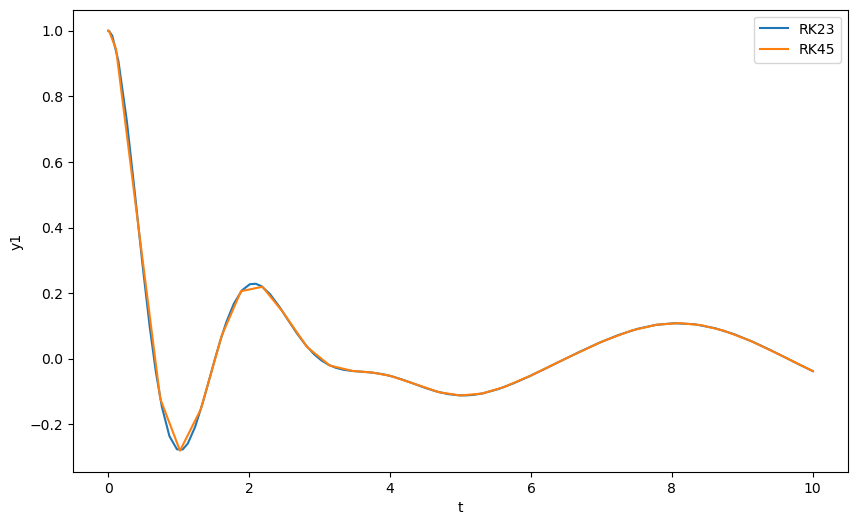

In [8]:
import numpy as np
from scipy.integrate import solve_ivp

def damped_oscillator_system(t, y):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = -2*y2 - 10*y1 + np.sin(t)
    return [dy1_dt, dy2_dt]

# Начальные условия
y0 = [1, 0]

# Временной интервал
t_span = [0, 10]

# Решение методом Рунге-Кутты второго,третьего порядка
sol_rk23 = solve_ivp(damped_oscillator_system, t_span, y0, method='RK23')

# Решение методом Рунге-Кутты четвёртого,пятого порядка
sol_rk45 = solve_ivp(damped_oscillator_system, t_span, y0, method='RK45')

# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sol_rk23.t, sol_rk23.y[0], label='RK23')
plt.plot(sol_rk45.t, sol_rk45.y[0], label='RK45')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()


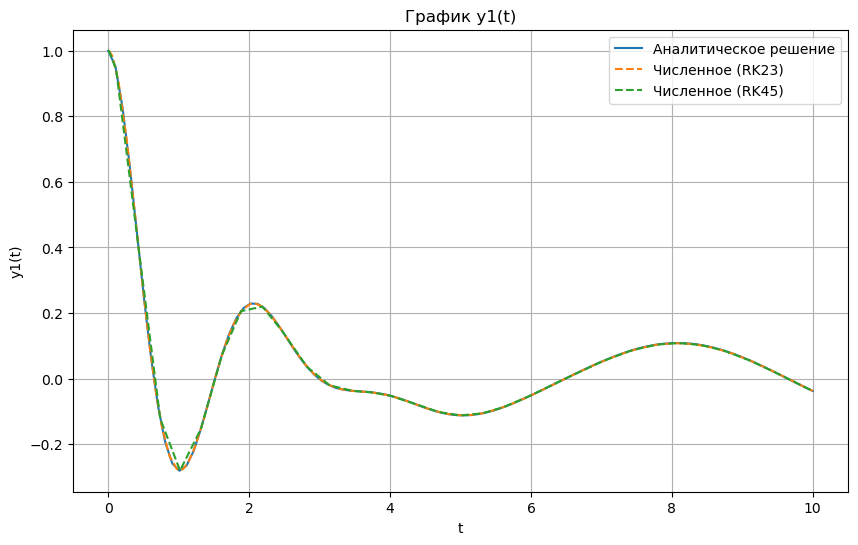

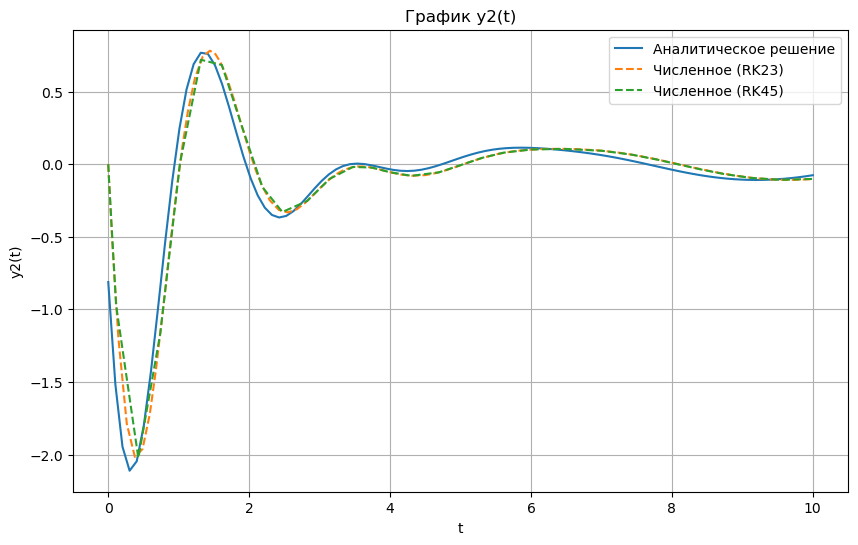

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def equations(t, y):
    y1, y2 = y[0], y[1]
    dy1_dt = y2
    dy2_dt = -2 * y2 - 10 * y1 + np.sin(t)
    return [dy1_dt, dy2_dt]


# Аналитическое решение
def analytical_solution(t):
    C1 = 87 / 85
    C2 = 26 / 85
    return np.exp(-t) * (C1 * np.cos(3 * t) + C2 * np.sin(3 * t)) + (9 * np.sin(t) - 2 * np.cos(t)) / 85


# Задаем начальные условия
t_span = (0, 10)
y0 = [1, 0]

# Численное решение методом RK23
sol_rk23 = solve_ivp(equations, t_span, y0, method='RK23', dense_output=True)
t_rk23 = sol_rk23.t
y_rk23 = sol_rk23.y[0]

# Численное решение методом RK45
sol_rk45 = solve_ivp(equations, t_span, y0, method='RK45', dense_output=True)
t_rk45 = sol_rk45.t
y_rk45 = sol_rk45.y[0]

# Построение графиков
t_analytical = np.linspace(t_span[0], t_span[1], 100)
C1 = 87 / 85
C2 = 26 / 85
y_analytical = analytical_solution(t_analytical)

plt.figure(figsize=(10, 6))
plt.plot(t_analytical, y_analytical, label='Аналитическое решение')
plt.plot(t_rk23, y_rk23, '--', label='Численное (RK23)')
plt.plot(t_rk45, y_rk45, '--', label='Численное (RK45)')
plt.xlabel('t')
plt.ylabel('y1(t)')
plt.title('График y1(t)')
plt.legend()
plt.grid(True)
plt.show()

# График скорости y2(t)
v_analytical = -np.exp(-t_analytical) * (3 * C1 * np.sin(3 * t_analytical) + 3 * C2 * np.cos(3 * t_analytical)) + (
        9 * np.cos(t_analytical) - 2 * np.sin(t_analytical)) / 85
v_rk23 = sol_rk23.y[1]
v_rk45 = sol_rk45.y[1]

plt.figure(figsize=(10, 6))
plt.plot(t_analytical, v_analytical, label='Аналитическое решение')
plt.plot(t_rk23, v_rk23, '--', label='Численное (RK23)')
plt.plot(t_rk45, v_rk45, '--', label='Численное (RK45)')
plt.xlabel('t')
plt.ylabel('y2(t)')
plt.title('График y2(t)')
plt.legend()
plt.grid(True)
plt.show()


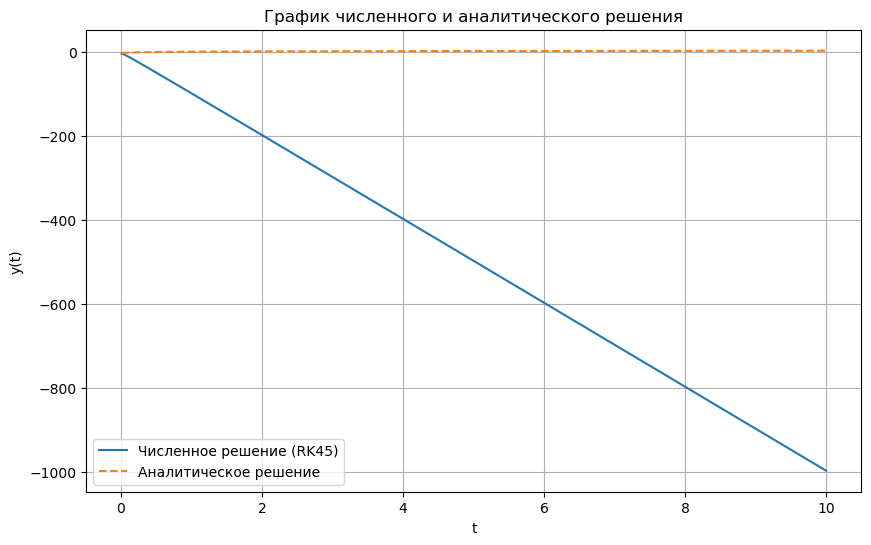

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def equations(t, y):
    y1, y2 = y[0], y[1]
    dy1_dt = y2
    dy2_dt = -1 / t**2
    return [dy1_dt, dy2_dt]


# Аналитическое решение
def analytical_solution(t):
    return np.log(t)


# Задаем начальные условия
t0 = 0.01
y0 = [np.log(t0), 0]

# Численное решение методом RK45
t_span = (t0, 10)  # Интервал интегрирования
sol = solve_ivp(equations, t_span, y0, method='RK45', dense_output=True)
t_numerical = sol.t
y_numerical = sol.y[0]

# Аналитическое решение
y_analytical = analytical_solution(t_numerical)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t_numerical, y_numerical, label='Численное решение (RK45)')
plt.plot(t_numerical, y_analytical, '--', label='Аналитическое решение')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('График численного и аналитического решения')
plt.legend()
plt.grid(True)
plt.show()
